In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Constants

In [3]:
MAX_WORDS = 100 # Maximum Number of words from a message
EMBEDDING_SIZE = 100  # Embeddings Dimension
TEST_PCT = 0.25 # ratio of testing set
BATCH_SIZE = 64 # Batch size for Mini Batch processing for training
N_EPOCHS = 5 # number of epochs

In [14]:
reviews_df = pd.read_csv("./Women's E-Commerce Clothing Reviews/Womens Clothing E-Commerce Reviews.csv")

In [15]:
reviews_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [16]:
reviews_df['Rating'].max(), reviews_df['Rating'].min()

(5, 1)

In [17]:
reviews = reviews_df['Review Text'].values

In [22]:
labels = reviews_df['Rating'].apply(lambda res: res <= 2)

In [43]:
labels[0], reviews[0]

(False, 'Absolutely wonderful - silky and sexy and comfortable')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=TEST_PCT, random_state=34)

In [46]:
print(X_train.dtype) 
X_train = X_train.astype('str') 
X_test = X_test.astype('str')
print(X_train.dtype)

<U507
<U507


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17614,), (5872,), (17614,), (5872,))

### Creating Tokens

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X = tokenizer.texts_to_sequences(X_train)

In [50]:
print(X[0], X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    7   89   35  553   86    1  211    6  127  343
   14 4450   37 1247    2   38  890    1  626    8   29  543  181    1
  281   16   19  228   49    2   55  259  164    2  120  537    8  213
    8  371    5  148   89    4  368 2052  626  634 1933  234    3  143
   16  456] This has great drape, length, the pattern is super versatile with solids or prints. i am finding the wool to be itchy around the neck, so not sure if i will keep, though i don't seem to want to take it off! has a lightweight, boiled wool texture, contrasting print and design so cool!


### Padding Token Sequences

In [35]:
X = pad_sequences(X, maxlen=MAX_WORDS)

In [36]:
X[0].shape

(100,)

In [37]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'have': 23,
 'very': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'me': 30,
 'as': 31,
 'wear': 32,
 "it's": 33,
 'too': 34,
 'great': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'would': 42,
 'up': 43,
 'at': 44,
 'small': 45,
 'fabric': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'really': 50,
 'ordered': 51,
 'more': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 'comfortable': 67,
 '\r': 68,
 'nice': 69,
 'cute': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'large': 78,
 'material':

### Creating Model

In [38]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, EMBEDDING_SIZE))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1309700   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,326,757
Trainable params: 1,326,757
Non-trainable params: 0
_________________________________________________________________


### Fitting the model over training set

In [40]:
history = model.fit(X, y_train, epochs=N_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 14091 samples, validate on 3523 samples
Epoch 1/20
14091/14091 [==============================] - 29s 2ms/sample - loss: 0.2823 - acc: 0.8965 - val_loss: 0.2283 - val_acc: 0.9024
Epoch 2/20
14091/14091 [==============================] - 25s 2ms/sample - loss: 0.2089 - acc: 0.9070 - val_loss: 0.2274 - val_acc: 0.9046
Epoch 3/20
14091/14091 [==============================] - 25s 2ms/sample - loss: 0.1923 - acc: 0.9149 - val_loss: 0.2505 - val_acc: 0.9097
Epoch 4/20
14091/14091 [==============================] - 25s 2ms/sample - loss: 0.1750 - acc: 0.9264 - val_loss: 0.2308 - val_acc: 0.9080
Epoch 5/20
14091/14091 [==============================] - 22s 2ms/sample - loss: 0.1633 - acc: 0.9300 - val_loss: 0.2541 - val_acc: 0.9097
Epoch 6/20
14091/14091 [==============================] - 23s 2ms/sample - loss: 0.1422 - acc: 0.9419 - val_loss: 0.2279 - val_acc: 0.8981
Epoch 7/20
14091/14091 [==============================] - 24s 2ms/sample - loss: 0.1286 - acc: 0.9499 - val_loss: 0.2

### Plotting accuracies and losses

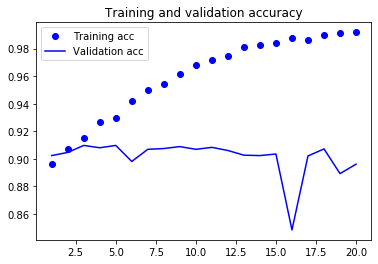

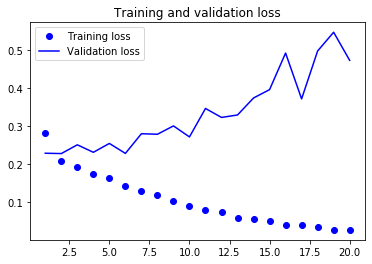

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
X_test[0], y_test

("I just go these socks in one of my beauty boxes!!! there is nothing like a new pair of socks. they feel amazing no matter what you do. these are ultra soft and in-line with other slipper socks i have tried with the grippies on the bottom. i like the color black style (actually, i like all the new styles at retailer right now), and i didn't think i would like the higher tabs in the back but it turns out i love them to make sure the sock is covering my whole ankle when i put my shoes on. the",
 23239    False
 6275     False
 20369    False
 13733    False
 4431     False
          ...  
 4796     False
 9971     False
 12088    False
 18351    False
 387      False
 Name: Rating, Length: 5872, dtype: bool)

### Tokenizing test set

In [47]:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(X_test)
X_tst = tokenizer.texts_to_sequences(X_test)
X_tst = pad_sequences(X_tst, maxlen=MAX_WORDS)

### Evaluating over test set

In [48]:
result = model.evaluate(X_tst, y_test)

5872/5872 [==============================] - 4s 737us/sample - loss: 0.4640 - acc: 0.8978


In [49]:
result

[0.46400159507563554, 0.8978202]